# Time Series Segmentation with sktime, ClaSP, and Blood Glucose Data

Review the paper tha this algorithm comes from: [ClaSP -- Parameter-free Time Series Segmentation](https://arxiv.org/abs/2207.13987)

In [ ]:
from sktime.transformations.compose import Id
from sktime.transformations.series.difference import Differencer
from sktime.transformations.series.lag import Lag

pipe = Id() + Differencer() + Lag([1, 2], index_out="original")

pipe.fit_transform(X)

In [10]:
import pandas as pd
from sktime.annotation.base._base import BaseSeriesAnnotator
change_points = pd.Series([1, 2, 5])
BaseSeriesAnnotator.change_points_to_segments(change_points, 0, 7)

[0, 1)   -1
[1, 2)    1
[2, 5)    2
[5, 7)    3
dtype: int64

In [1]:
import sys

sys.path.insert(0, "..")

import pandas as pd
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

from sktime.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes
from sktime.annotation.plotting.utils import (
    plot_time_series_with_change_points,
    plot_time_series_with_profiles,
)
from sktime.datasets import load_electric_devices_segmentation


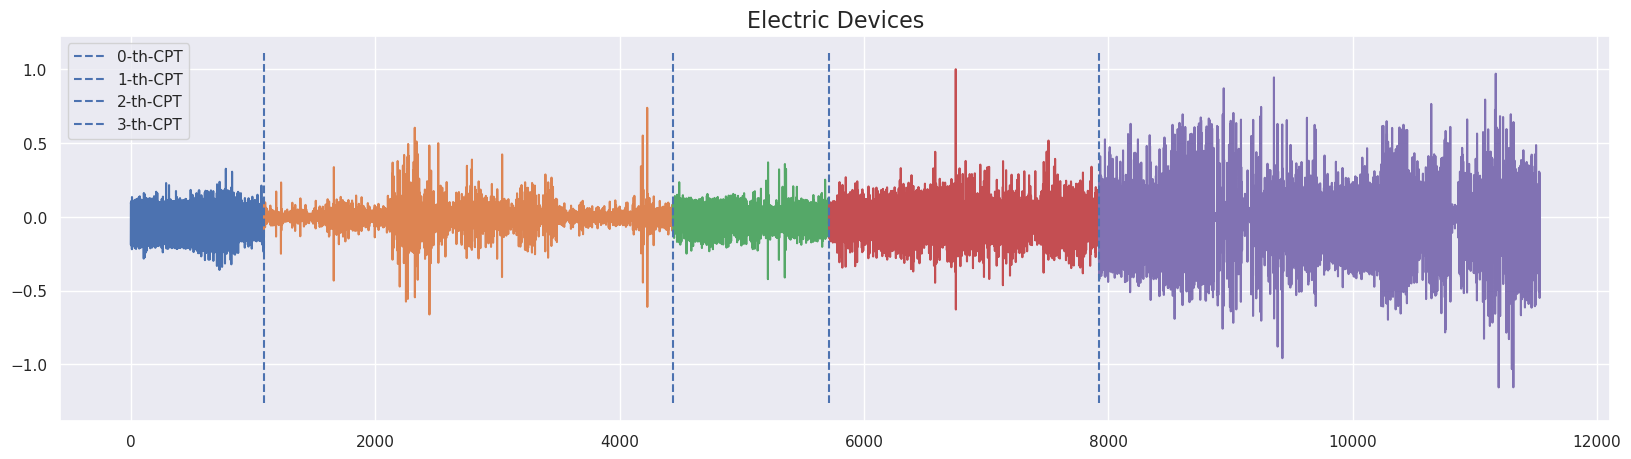

In [2]:
ts, period_size, true_cps = load_electric_devices_segmentation()
_ = plot_time_series_with_change_points("Electric Devices", ts, true_cps)

In [12]:
true_cps

array([1090, 4436, 5712, 7923], dtype=int32)

In [3]:
# ts is a pd.Series
# we convert it into a DataFrame for display purposed only
pd.DataFrame(ts)

,1
1,-0.187086
2,0.098119
3,0.088967
4,0.107328
5,-0.193514
...,...
11528,0.300240
11529,0.200745
11530,-0.548908
11531,0.274886


In [4]:
clasp = ClaSPSegmentation(period_length=period_size, n_cps=2)
found_cps = clasp.fit_predict(ts)
profiles = clasp.profiles
scores = clasp.scores
print("The found change points are", found_cps.to_numpy())

The found change points are [1038 4525]


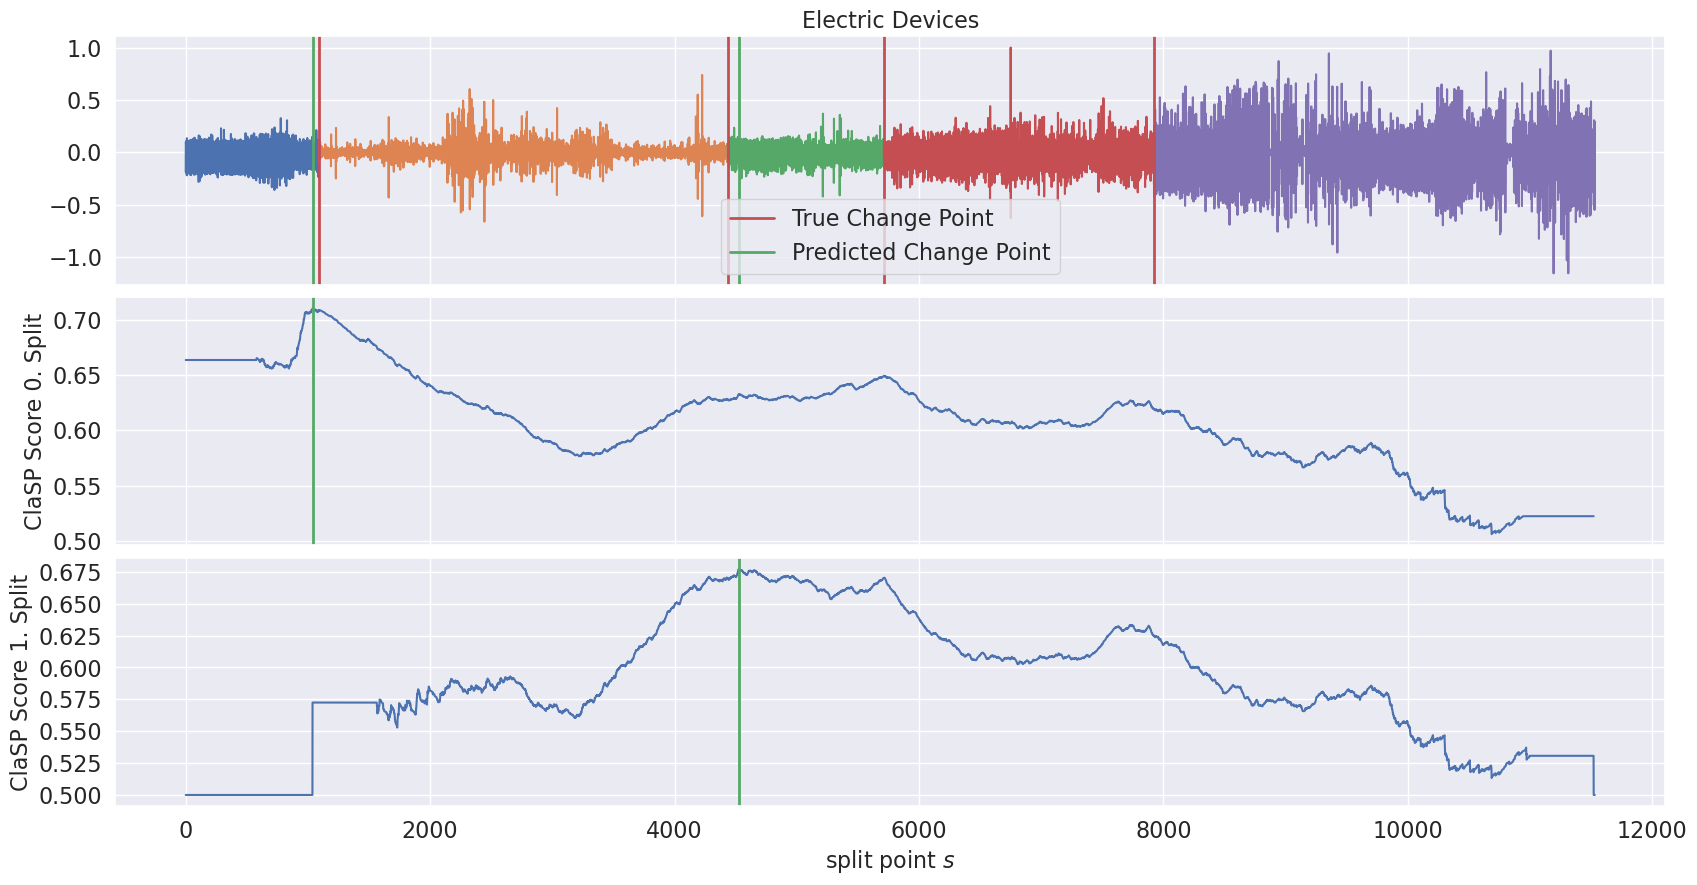

In [5]:
_ = plot_time_series_with_profiles(
    "Electric Devices",
    ts,
    profiles,
    true_cps,
    found_cps,
)

In [7]:
clasp = ClaSPSegmentation(period_length=period_size, n_cps=2)
found_segmentation = clasp.fit_predict(ts)
print(found_segmentation)

0    1038
1    4525
dtype: int64


In [8]:
dominant_period_size = find_dominant_window_sizes(ts)
print("Dominant Period", dominant_period_size)


Dominant Period 10


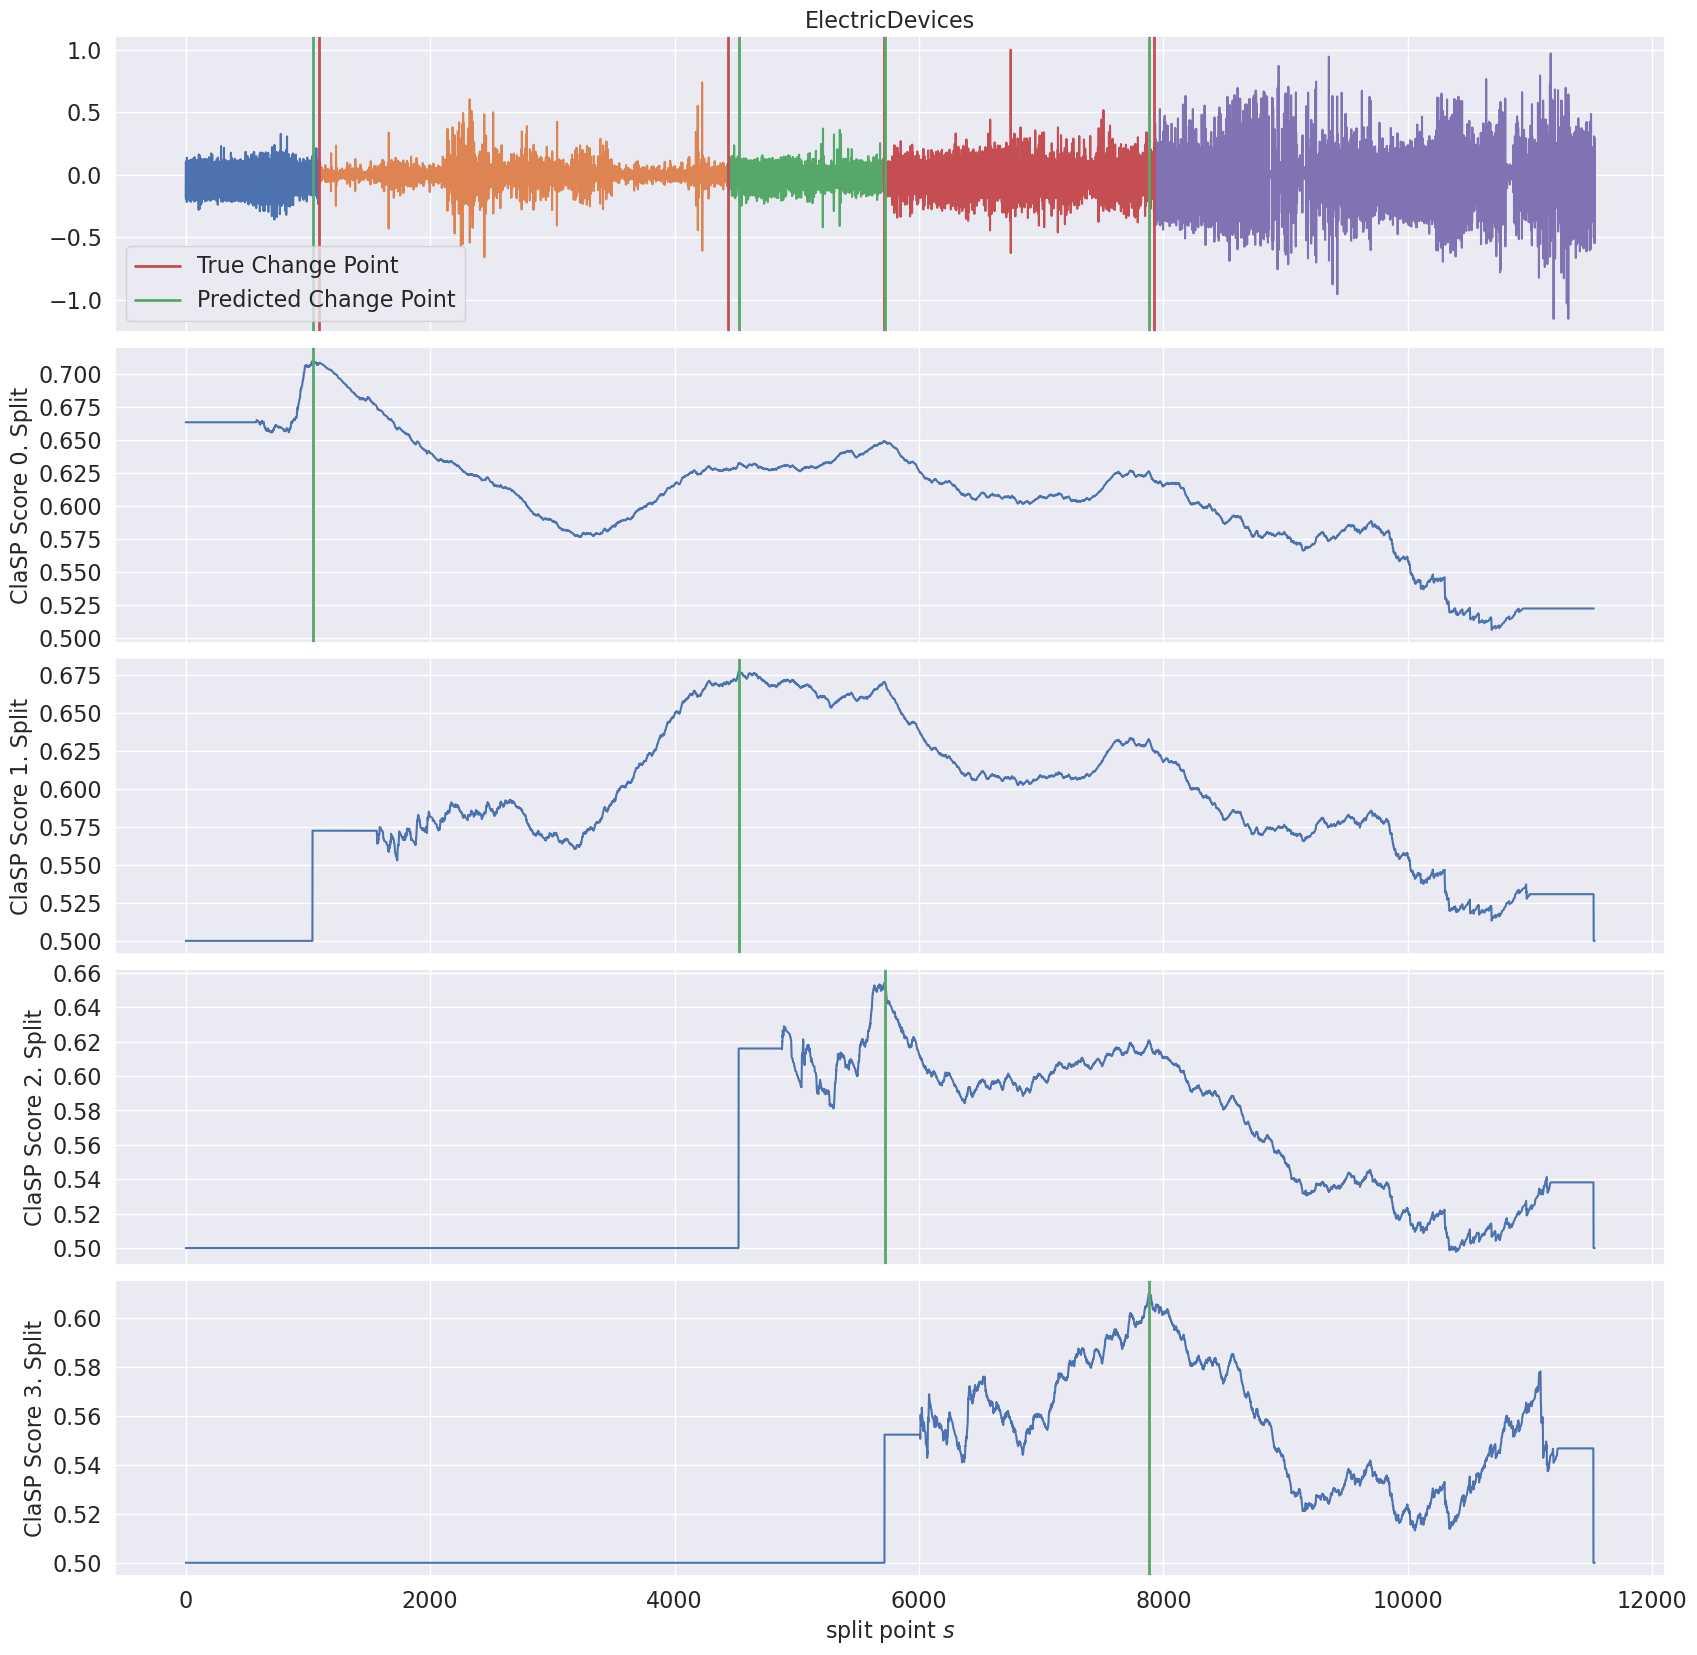

In [9]:
clasp = ClaSPSegmentation(period_length=dominant_period_size, n_cps=2)
found_cps = clasp.fit_predict(ts)
profiles = clasp.profiles
scores = clasp.scores

_ = plot_time_series_with_profiles(
    "ElectricDevices",
    ts,
    profiles,
    true_cps,
    found_cps,
)
